# Lecture 12: Integrating iterated integration (Bernoulli Polynomials)

## Aim of today

So far, this course has really focused on developing coding literacy through basic mathematical concepts.

However, that's not all this course is!
This is a *mathematical* computing course,
so you need to learn both mathematical and computing techniques.

I want to acknowledge this because, this is a very broad church.
As well as both advanced and normal streams,
different students will be more or less familiar with the mathematical content,
or the programming content (or neither!).

This lecture is going to bring back the emphasis to mathematical techniques.
To give it all away, today we will:

 - Define the error of an integration scheme.
 
 
 - Try investigating it with **integration by parts**.
 
 
 - Explore where that approach takes us (it's mathy and great, and illustrates how people actually find things out).
 
 
 - Using our `Rational` and `Polynomial` classes to help us.
 
 
Then, tomorrow we'll continue on this path and really answer why different integration schemes have different accuracy in different situations.


## Recap on L10 and L11

### Approximate functions

We are interested in computing the following integral:

$$
\large 
I \ = \  \int_{a}^{b}  f(x) \, \mathrm{d}x 
$$

For either the trapezoidal rule, or Simpson's rule, we approximate $f(x)$ by either a linear function (more properly called  an *'affine'* function), $L(x)$, or a quadratic function, $Q(x)$.
For the linear approximation $L$, we require

<br>

$$
\large 
L(a) \ = \ f(a), \quad L(b) \ = \ f(b)$$

and for the quadratic approximation $Q$ we require

<br>

$$\large 
Q(a) \ =  \ f(a), \quad Q(b) \  = \ f(b), \quad Q(m) \ = \ f(m) $$

<br>

Either way, they are the same at the end points, $a,b$.  

## Exact integrals of approximate function

The hope with these approximations is that they are close to the actual function,
so that, *in some sense*

<br>
$$
\large
f(x) \approx L(x) , \quad \mathrm{or} \quad
f(x) \approx Q(x),
$$

If that works, then it makes sense to expect 

**for the trapezoidal rule:**

$$
\large
\int_{a}^{b} f(x) \, \mathrm{d}x \ \approx \ \int_{a}^{b} L(x) \, \mathrm{d}x  \ = \ h\, \frac{f(a)+f(b)}{2}
$$

or 

<br>

**for Simpson's rule:**

$$
\large
\int_{a}^{b} f(x) \, \mathrm{d}x \ \approx \ \int_{a}^{b} Q(x) \, \mathrm{d}x  \ = \ \frac{h}{6}\, (\, f(a) \ + 4\, f(m) \ + \ f(b) \, )$$

where 

<br>
$$
\large
h \ \equiv \ b- a , \quad \quad \quad m \ \equiv \ \frac{b+a}{2}.
$$

## Important aside: Generalising

Note that we could use a cubic, of quartic, or any other degree we like.
But, as you can see, every added degree requires an additional condition to calculate all the coefficients.

### How do we choose these conditions? 

What we are doing above is **interpolation**: 
forcing the approximation to agree with the function at certain locations.
Hopefully, if the approximation agrees exactly at some points, 
then it won't get too bad between these points.

But there are **other** very sensible choices for approximating a function:

- maybe we want to minimise the *integral* of the difference.


- maybe the integral of the *square* of the difference...


- Heck, we might not even want to approximate the function with polynomials.

Maybe there are different functions we like.

There are lots of ways to approximate a function...

Let's look at defining the error in a concrete sense.
That way we can work with it.

## Measuring the error

### Error function, $e(x)$

(Not *The* error function).

In either case, we want to estimate how big the difference is between the true integral, and the approximation.

A sensible definition for the "error" function $e$ is: 

<br>
$$
\large
e(x) \ = \ f(x) - L(x), \quad \mathrm{or} \quad e(x) \ = \  f(x) - Q(x) 
$$

Again, by definition $e(a) = e(b)  = 0$. 

How can we use $e$ to quantify the error of of the integral of the function? 

### Error integral $\mathcal{E}$

We can compute the error between the integrals $\mathcal{E}$ by computing the integral of the error $e$ between the functions (because integration is linear -- it splits over addition). Therefor we consider

$$
\large
\mathcal{E} \ \equiv \ \int_{0}^{h} e(x) \, \mathrm{d}x 
$$

<br>

From now on we will assume $a=0$, and $b=h$;  this is without loss of generality. 
Now what do we do?

### Integration by parts

To analyse this, we want to use **integration by parts.** 
One of the top-three most useful techniques in the mathematical arsenal. 

For any two functions $u(x)$, and $v(x)$, 

$$
\large
\int_{a}^{b} u(x)\, v'(x) \, \mathrm{d}x \ = \ u(b)\,v(b) - u(a)\,v(a) - \int_{a}^{b} u'(x)\, v(x) \, \mathrm{d}x
$$

The issue is that the integral $\mathcal{E}$ only has one function, not two, and no functions with a derivative on acting on them. 

## Forcing a fit

But we can fix this.  We do this by making a mathematical [Procrustean bed](https://en.wikipedia.org/wiki/Procrustes).

Ten years from now, if you only remember one thing about this lecture, it should be this. The idea is we don't have something that will fit with integration by parts. So we *make* something that will fit with integration by parts.

### Multiply by 1 (one of the oldest tricks in the book)

Put the number "$1$" into the integral. 

$$
\large
\mathcal{E} \ \equiv \ \int_{0}^{h} e(x) \times 1  \, \mathrm{d}x 
$$

<br>

Then pretend that the number the number "$1$" is actually a function of $x/h$; it technically is. 

<br>


$$
\large
\mathcal{E} \ \equiv \ \int_{0}^{h} e(x) \ B_{0}(x/h) \, \mathrm{d}x \quad \quad \text{where} \quad \quad B_{0}(x) \ = \ 1. 
$$

<br>

The reason for using the letter $B$ will become apparent later. For now, we just inserted a function into the integral. It's starting to look more ready for integration by parts. But we still don't have a derivative. Let's make one.

### Defining a derivative

Define 

$$
\large
\frac{d}{dx} B_{1}(x) \ = \ B_{0}(x) \quad \implies \quad B_{1}(x) = x + b_{1} \quad \text{for some constant,} \quad b_{1}
$$

<br>

From now on, we'll have *functions* $B_{n}(x)$, and *numbers* 

<br>

$$
\large
b_{n} \ \equiv \ B_{n}(0)
$$

We don't know what these numbers should be yet. But we'll get there. 


Now things are looking a lot better for integration by parts

$$
\large
\mathcal{E} \ \equiv \ h\, \int_{0}^{h} e(x) \ \frac{d}{dx} B_{1}(x/h) \, \mathrm{d}x 
$$

### Integrate by parts

Let's integrate by parts. Using the formula,

$$
\large
\mathcal{E} \ \equiv \ h\, \left[ e(h)\, (1+b_{1}) - e(0)\, b_{1} \right]  - h \, \int_{0}^{h} e'(x) \  B_{1}(x/h) \, \mathrm{d}x 
$$

But recall that 

$$
\large
e(h) \ = \  e(0) \ = \ 0 \quad   \textit{by  design}. 
$$

Recall that $e(x) = f(x) - L(x)$, or $e(x) = f(x) - Q(x)$, or a more general version of this.

Therefore

$$
\large
\mathcal{E} \ = \ - h \, \int_{0}^{h} e'(x) \  B_{1}(x/h) \, \mathrm{d}x.
$$








## Cauchy-Schwarz inequality

If we have the integral of the product of two functions we can make an inequality in terms of the square integral of each function. 

If 

$$
\large 
I \ \equiv \ \int_{a}^{b} f(x) g(x) \, \text{d} x \quad \quad\implies \quad \quad |\,I\,| \ \le \ \sqrt{\int_{a}^{b} f(x)^{2} \, \text{d} x} \, \times \, \sqrt{ \int_{a}^{b} g(x)^{2} \, \text{d} x }
$$


## (1,$\infty$) Holder inequality


There is another really useful inequality that's even simpler, 

$$
\large 
I \ \equiv \ \int_{a}^{b} f(x) g(x) \, \text{d} x \quad \quad\implies \quad \quad |\,I\,| \ \le \  \max_{a\le x\le b} |\,f(x) \, |  \int_{a}^{b} |\,g(x)\,| \, \text{d} x 
$$

<br>

The general Holder has the above two inequalities as special cases. But these are plenty for what we need. 

## Choosing $b_1$: minimising our estimate.

This is for $B_{1}(x) = x + b_{1}$ with $b_{1}$ not known.  How do we pick $b_{1}$?  There are a lot of ways we could choose to pick $b_{1}$. No matter what we do, we want to make it so that $B_{1}(x)$ is a small as possible. Otherwise, we would be making the estimate of $\mathcal{E}$ larger than it needs to be.  

The Holder inequality:

$$
\large
|\,\mathcal{E}\,| \  \  \le  \ \  h \, \max_{0\le x\le h} |e'(x)|\int_{0}^{h} |\,B_{1}(x/h)\,|\, \mathrm{d}x
$$

We have no power to control how big $ |e'(x)|$ is. But we haven't completely set $B_{1}(x)$. We can minimise the right hand side. 

### $L_1$ minimisation is hard! $L_{2}$ is much easier. 

Therefore using Cauchy-Schwartz 

$$
\large 
\int_{0}^{h} |\,B_{1}(x/h)\,|\, \mathrm{d}x \ \le  \ \sqrt{\int_{0}^{h} 1\, \mathrm{d}x} \, \sqrt{\int_{0}^{h} B_{1}(x/h)^2\, \mathrm{d}x} \ = \ \sqrt{ h \, \int_{0}^{h} B_{1}(x/h)^2\, \mathrm{d}x}
$$


<br>


<h3><center> We finally have something useful that we can work with </center></h3>

$$
\Large
|\,\mathcal{E}\,| \  \  \le  \ \  h  \, \max_{0\le x\le h} |e'(x)|\ \sqrt{h \int_{0}^{1} B_{1}(x)^2\, \mathrm{d}x } 
$$


<h3><center> We can minimise the right-hand side. </center></h3>

<br>

Three equivalent options for setting $b_{1}$ are 

$$
\large
{|}\, B_{1}(1) \, {|}  = {|} \, B_{0}(0) \, {|}
, \quad \quad
\int_{0}^{1} B_{1}(x) \, \mathrm{d} x \ = \ 0, \quad \quad \mathrm{or} \quad \int_{0}^{1} B_{1}(x)^{2} \, \mathrm{d} x \ \to \ \text{minimum}.
$$

Therefore 

$$
\large 
\int_{0}^{1} B_{1}(x)^2\, \mathrm{d}x \ = \  \int_{0}^{1} (x+b_{1})^2\, \mathrm{d}x \ = \ b_1^2+b_1+\frac{1}{3}
$$


<br>

Minimising gives

$$
\large 
b_{1} \ \equiv \ - \frac{1}{2}.
$$


Therefore 

$$
\large
B_{0}(x) \ = \ 1 \quad \quad B_{1}(x) \ = \ x \, - \, \frac{1}{2}.
$$

<br>


$$
\Large
|\,\mathcal{E}\,| \  \  \le  \ \  \frac{h^{2}}{\sqrt{12}}  \, \max_{0\le x\le h} |e'(x)|
$$

<h2><center> This is our first *estimate* for how big the integration error is. </center></h2>

### Let's keep going...  Integrating again

Like before, 
$$
\large
B_{1}(x) \ = \ \frac{1}{2} \frac{d}{dx} \left( x^{2} - x + b_{2} \right) \ = \ \frac{1}{2}\frac{d}{dx} B_{2}(x)
$$

In the same way as $b_{1}$ we solve and find


$$
\large
b_{2} \ = \ \frac{1}{6}, \quad \mathrm{and} \quad B_{2} \ = \ x^{2} - x + \frac{1}{6}
$$

Therefore

$$
\large
\mathcal{E} \ = \ - \frac{h^{2}}{2} \, \int_{0}^{h} e'(x) \  \frac{d}{dx} B_{2}(x/h) \, \mathrm{d}x.
$$

Using integration by parts and going to another,

$$
\large
\mathcal{E} \ = \  - \frac{h^{2} b_{2} }{2} \left( e'(h) - e'(0) \right)  \ +  \ \frac{h^{3}}{3!} \, \int_{0}^{h} e''(x) \  \frac{d}{dx} B_{3}(x/h) \, \mathrm{d}x
$$

Where

$$
\large
b_{3} \ = \ 0, \quad \mathrm{and} \quad B_{3}(x) \ = \ x^3-\frac{3 x^2}{2}+\frac{x}{2}
$$

Because $b_{3} \ = \ 0$, we have $B_3(0) \ = \ B_3(h/h) \ = \ 0$, so we can automatically go to another order in the integration by parts without getting a boundary term. 

$$
\large
\mathcal{E} \ = \  - \frac{h^{2} b_{2} }{2} \left( e'(h) - e'(0) \right)  \ -  \ \frac{h^{4}}{4!} \, \int_{0}^{h} e'''(x) \  \frac{d}{dx} B_{4}(x/h) \, \mathrm{d}x,
$$

where

$$
\large
b_{4} \ = \ -\frac{1}{30}, \quad \mathrm{and} \quad B_{4}(x) \ = \ x^4-2 x^3+x^2-\frac{1}{30}
$$

Doing the iteration one more time, and using the actual values for $b_{2}$ and $b_{4}$,

The is the first few terms of the 

# Euler-Maclaurin formula:

\begin{align}
\large
    \int_{0}^{h} f(x) \, \mathrm{d} x \ &= \ \large \frac{h}{2} \left( \ f(h) \ + \ f(0)\ \right)   - \frac{h^{2}}{12} \left(\  f'(h) - f'(0) \ \right)  \ +  \ \frac{h^{4}}{720}\left( \ f'''(h) - f'''(0) \ \right) \\ 
    & \large \quad - \frac{h^{6}}{6!}\int_{0}^{h} f^{\,(5)}(x) \  \frac{d}{dx} B_{6}(x/h) \, \mathrm{d}x,
\end{align}

<br>

Integrating by parts to get here, we naturally introduced a set of polynomials. These polynomials have names and are very important for a lot of reasons.

## The sum of all the integers.

Some of you may have heard the crazy notion that 

$$
\Large \sum_{n=1}^{\infty} n \ = \ - \frac{1}{12}.
$$


You might also hear a lot of oogie-boogie about the "deep nature of infinity" and such and such surrounding this result. But it turns out that the sum of all the integers is 

* (a) Definitely infinity; and 
    


* (b) There is a perfectly *common sense* argument that allows us to pretend that it's $-1/12$ in certain applications; no need even to appeal to fancy mathematics like the analytic continuation of the Riemann-$\zeta$ function. 

Here is not the place to give a full discussion of this. But just so you know, there is no magic. To give an idea of what's going on.  It's a simple fact that

<br>

$$
\large
\sum_{n=1}^{\infty} n\, e^{- \varepsilon n  } \ = \   \frac{e^{-\varepsilon
   }}{\left(1-e^{-\varepsilon
   }\right)^2} \ = \  \frac{1}{\varepsilon^{2}}  -   \frac{1}{12} +  \frac{\varepsilon ^2}{240}   \ + \    \ldots  \quad \text{as} \quad \varepsilon \to 0. 
$$

This is the derivative of a geometric series in disguise; where $x = e^{- \varepsilon }$. 
This says that this *convergent* sum has three parts: something tiny, something huge, and something modest. True applications that produce the first sumactually want something much more like the second sum. The thing that's a little magical is that real applications almost never care about the huge part, or the tiny part. The tiny part is tiny, and the huge part will always cancel in some cleaver way before we need answers. The modest part is all that's left over. The even cooler thing is that this idea stays the same if we change the function $e^{- \varepsilon n  }$ to anything else that behaves in a similar way. The huge part will change a bit. But the modest part will always come out to $-1/12$. This is why we can just use $-1/12$ and call it a day. But doing this requires some care in making sure you don't violate any of the legal fine print that that validates the calculation. 

The Legal Fine Print relates back to a sligltly different version of the Euler---Maclaurin formula:

<br>

$$\large
\sum_{n=0}^{\infty} F(n)  \ = \  \int_{0}^{\infty} F(x) \, \text{d}x \ + \  \frac{F(0)}{2}  \ - \  \frac{F'(0)}{12} \ + \  \frac{F'''(0)}{720} \ + \  \ldots   
$$

The coefficients in the series are Bernoulli numbers divided by factorials; $b_{2k}/(2k)!$.
We can get what we want by assuming 

<br>

$$\large
F(n)  \  = \ n f(\varepsilon n), \quad \text{where} \quad f(0) = 1 \quad \text{and} \quad \lim_{x\to \infty} f(x) \ = \  0.
$$

The smooth function  $f(\varepsilon n)$ acts as a cutoff when the terms get too big. We don't deserve to understand what happens at truely huge numbers; other effects will become important no matter what application we are considering. Cutoffs exist, but we don't know much about their details. Then 

<br>

$$\large
\sum_{n=0}^{\infty} n\, f(\varepsilon n) \ = \ \frac{\int_{0}^{\infty} x f(x) \, \text{d}x }{\varepsilon^{2}} \ - \ \frac{1}{12} \ + \ \frac{\varepsilon^{2} f''(0)}{240} \ + \ \ldots 
$$

<h3><center>This is true for any function where f(0) = 1, and vanishes at infinity.</center></h3>

For $0 <  \varepsilon \ll 1$, the fist term is huge, the second term is what we want, and the third term (and neglected terms) are tiny.  

In any application, the leading-order integral is dispatched in one of two ways:

*  It cancels down the line in some way with another term just like it, and all that is left is the $-1/12$ plus a bunch of tiny stuff. 



* Or, it doesn't cancel. In this case, the details of our models depend on the details of the cutoff function, $f(x)$, but only in this minimal way. In the second case, we give a name to the integral divided by $\varepsilon^{2}$ and use it as a parameter of our model. 


In any kind of model quantities are either discarded because they don't enter into our formulas, or they are given a name and measured because they do enter into our formulas.

## Bernoulli polynomials

https://en.wikipedia.org/wiki/Bernoulli_polynomials

## Bernoulli numbers

https://en.wikipedia.org/wiki/Bernoulli_number

<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Jakob_Bernoulli.jpg" width=200>

**They're kind of a big deal.**

## Appell sequences


### Monomials 


Define a fancy name for something that you see everyday.

$$
\large M_{n}(x) \ \equiv \ x^{n}.
$$



One of the simples features of monomials 

$$
\large
\frac{d}{dx}\, x^{n} \ = \ n \, x^{n-1} \quad \implies \quad \frac{d}{dx}\, M_{n}(x) \ = \ n \, M_{n-1}(x)
$$

If we think about this as a sequence of differential equations we can determine the monomials uniquely with the conditions 

$$
\large M_{0}(x)  \ = \ 1, \quad \quad \text{and} \quad \quad M_{n}(0) \ = \ 0 \quad \text{for} \quad n \ \ge \ 1.
$$

This is likely one of the first things you learned in Calculus. 



### Bernoulli polynomials  


The ***Bernoulli polynomials*** are defined almost the same way

$$
\large 
\frac{d}{dx}\, B_{n}(x) \ = \ n \, B_{n-1}(x)
$$

We set the constants at each iteration with 

$$
\large
B_{0}(x) = 1, \quad   \quad  \int_{0}^{1} B_{n}(x) \, \mathrm{d}x  \ = \ 0, \quad \mathrm{for} \quad n \ge 1. 
$$

We can use these definitions to find a relation for the Bernoulli numbers,

$$
\large
b_{n} \ = \ n \,\int_{0}^{1}x\, B_{n-1}(x)\, \mathrm{d} x \ = \ B_{n}(0).
$$



### Hermite polynomials  

There is at least one important sequence of polynomials that satisfy a similar chain of differentiation 

$$\large
\frac{d}{dx} H\!e_{n}(x) \ = \ n \, H\!e_{n-1}(x)
$$

**Note:** These are defined in terms of what Physicists usally call Hermite polynomials via $H\!e(x) = H(x/2)$. 

These satisfy the relations 

$$\large
H\!e_{0}(x) \ = \ 1, \quad   \quad  \frac{1}{\sqrt{4\pi}}\int_{-\infty}^{\infty} e^{-\frac{x^{2}}{4}} H\!e_{n}(x) \, \mathrm{d}x  \ = \ 0, \quad \mathrm{for} \quad n \ge 1. 
$$


The resulting sequence of numbers that result from this case are the ***Hermite numbers***

$$
\large
h_{n} \ = \ H\!e_{n}(0) \ = \ -2 (n-1) \, h_{n-2}, \quad \text{where} \quad h_{0} \ = \ 1, \quad \text{and} \quad h_{1} \ = \ 1.
$$


### General cases 

Any sequence of polynomials that satisfy the relation 

$$\large
\frac{d}{dx} p_{n}(x) \ = \ n \, p_{n-1}(x) \quad \quad \longleftrightarrow \quad \quad \textit{Appell sequences}.
$$

This is just a name for something that pops up from time to time. But the interesting thing is that these sequences have useful properties in common.


<h4><center> Taylor's Theorem and the  Euler-Maclaurin formula are only the first two examples of an infinity of similar theorems. </center></h4>



### Some properties of Bernoulli polynomials and their cousins 

These polynomials and numbers have a huge number of remarkable properties. The polynomials and numbers show up in every branch of advanced mathematics; topology, algebraic geometry, combinatorics, probability, and more. They also show up in import areas of modern physics. They arise when trying to compute Feynman diagrams in quantum field theory and string theory.  


### Generating functions

Because of their similarity with monomials, they share a lot of similar properties. For example, Appell sequences have simple ***exponential generating functions***:

$$\large
e^{t\, x} \ = \ \sum_{n=0}^{\infty}\  M_{n}(x)\  \frac{t^{n}}{n!}, \quad \quad  \frac{t\, e^{t\, x}}{e^{t}-1} \ = \ \sum_{n=0}^{\infty}\  B_{n}(x)\  \frac{t^{n}}{n!},  \quad \quad  e^{-t^2+t \,x} \ = \ \sum_{n=0}^{\infty}\  H\!e_{n}(x)\  \frac{t^{n}}{n!} $$


### Umbral calculus 


The traditional ***Binomial theorem*** gives 

$$ \large
(x+y)^{n} \ = \ \sum_{k=0}^{n} \binom{n}{k}\  x^{k}\ y^{n-k}, \quad  \implies \quad  M_{n}(x+y) \ = \ \sum_{k=0}^{n} \binom{n}{k}\  M_{k}(x)\ M_{n-k}(y)
$$


Appell sequences also satisfy a kind of Binomial theorem,

$$ \large
B_{n}(x+y) \ = \ \sum_{k=0}^{n} \binom{n}{k}\  B_{k}(x)\ M_{n-k}(y), \quad  \quad  H\!e_{n}(x+y) \ = \ \sum_{k=0}^{n}  \binom{n}{k}\  H\!e_{k}(x)\ M_{n-k}(y)$$

One of my favorites is that they relate to the computation of the sums of powers of integers,

<br>

### Sums of integers

$$ \large
\sum_{k=1}^{n} k^{p} \ = \  \int_{1}^{n+1}  B_{p}(x) \, \mathrm{d} x \ = \ \frac{B_{p+1}(n) - b_{p+1}}{p+1} + n^{p} 
$$


There are many more interesting properties of Bernoulli polynomials. They show up in geometry, combinatorics, algebra, everything. 

<br>

## Investigating the `class` of polynomials

Using the `classes` we created earlier in the semester, we can build and manipulate the Bernoulli (or any) polynomials:

So we've made a rudimentary symbolic algebra package!
Any time you plug something in to Mathematica and it seems like magic, remember that it's really not that different to what we've already done.

You can access the polynomial and rational classes from this lecture to check your answers from the last tutorial.
See if you notice anything to fix too!

Let's see what happens

In [1]:
from algebra import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define the fundamental polynomials, $1$, and $x$.

In [2]:
one = rational(1)
I = Polynomial(one)
I.show()

X = Polynomial()
X[1] = one
X.show()

$1$

$x$

We can take the derivative and integral

In [5]:
X.derivative().show()
X.integral().show()
X.integral(ab=[0,1])

$1$

$\frac{1}{2}x^{2}$

1/2

### Dictionaries of polynomial sequences 

In [6]:
B = {0:I}

half = rational(1,2)
B[1] = X - half


# Dictoinary for the Bernoulli numbers
b = {0:B[0](0),1:B[1](0)}

In [7]:
for k in range(2,100):
    B[k]  = k*B[k-1].integral()
    B[k] -=   B[k].integral(ab=[0,1])
    b[k]  =   B[k](0)

B[2].show()

$\frac{1}{6} - x + x^{2}$

In [8]:
b[4]

-1/30

$\frac{5}{66} - \frac{3}{2}x^{2} + 5\,x^{4} - 7\,x^{6} + \frac{15}{2}x^{8} - 5\,x^{9} + x^{10}$

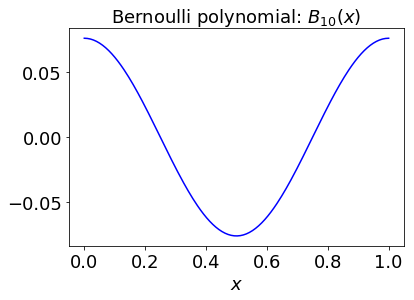

In [9]:
print('')
B[10].show()
B[10].plot(0,1,title='Bernoulli polynomial: $B_{10}(x)$')

### First 7 polynomials

In [10]:
for n in range(0,7): B[n].show()

$1$

$-\frac{1}{2} + x$

$\frac{1}{6} - x + x^{2}$

$\frac{1}{2}x - \frac{3}{2}x^{2} + x^{3}$

$-\frac{1}{30} + x^{2} - 2\,x^{3} + x^{4}$

$-\frac{1}{6}x + \frac{5}{3}x^{3} - \frac{5}{2}x^{4} + x^{5}$

$\frac{1}{42} - \frac{1}{2}x^{2} + \frac{5}{2}x^{4} - 3\,x^{5} + x^{6}$

### The first 50 Bernoulli numbers

They get big fast

In [11]:
print(' n     Bernouli number')
print('---    ---------------')
for n in range(0,50): print("{:>2d}: {:>9.2e} = {:>1s}".format(n, float(b[n]), str(b[n])))

 n     Bernouli number
---    ---------------
 0:  1.00e+00 = 1
 1: -5.00e-01 = -1/2
 2:  1.67e-01 = 1/6
 3:  0.00e+00 = 0
 4: -3.33e-02 = -1/30
 5:  0.00e+00 = 0
 6:  2.38e-02 = 1/42
 7:  0.00e+00 = 0
 8: -3.33e-02 = -1/30
 9:  0.00e+00 = 0
10:  7.58e-02 = 5/66
11:  0.00e+00 = 0
12: -2.53e-01 = -691/2730
13:  0.00e+00 = 0
14:  1.17e+00 = 7/6
15:  0.00e+00 = 0
16: -7.09e+00 = -3617/510
17:  0.00e+00 = 0
18:  5.50e+01 = 43867/798
19:  0.00e+00 = 0
20: -5.29e+02 = -174611/330
21:  0.00e+00 = 0
22:  6.19e+03 = 854513/138
23:  0.00e+00 = 0
24: -8.66e+04 = -236364091/2730
25:  0.00e+00 = 0
26:  1.43e+06 = 8553103/6
27:  0.00e+00 = 0
28: -2.73e+07 = -23749461029/870
29:  0.00e+00 = 0
30:  6.02e+08 = 8615841276005/14322
31:  0.00e+00 = 0
32: -1.51e+10 = -7709321041217/510
33:  0.00e+00 = 0
34:  4.30e+11 = 2577687858367/6
35:  0.00e+00 = 0
36: -1.37e+13 = -26315271553053477373/1919190
37:  0.00e+00 = 0
38:  4.88e+14 = 2929993913841559/6
39:  0.00e+00 = 0
40: -1.93e+16 = -261082718496449122051/

Here is a simple check that one of the formulae gives the right result:

$$
\large
b_{n} \ = \ B_{n}(0) \ = \ n \int_{0}^{1} B_{n-1}(x) \, \text{d} x
$$

In [14]:
n = 16
print(b[n])
print(B[n](0))
print(n*(X*B[n-1]).integral(ab=[0,1]) )

-3617/510
-3617/510
-3617/510


Here are some plots of the fist few polynomials:

In [25]:
B[6].show()
B[10].show()
B[14].show()

$\frac{1}{42} - \frac{1}{2}x^{2} + \frac{5}{2}x^{4} - 3\,x^{5} + x^{6}$

$\frac{5}{66} - \frac{3}{2}x^{2} + 5\,x^{4} - 7\,x^{6} + \frac{15}{2}x^{8} - 5\,x^{9} + x^{10}$

$\frac{7}{6} - \frac{691}{30}x^{2} + \frac{455}{6}x^{4} - \frac{1001}{10}x^{6} + \frac{143}{2}x^{8} - \frac{1001}{30}x^{10} + \frac{91}{6}x^{12} - 7\,x^{13} + x^{14}$

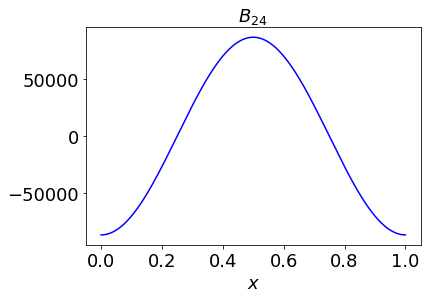

In [33]:
n = 24
B[n].plot(0,1,title='$B_{%s}$' % n)

Perhaps you can see a pattern? Let's investigate:

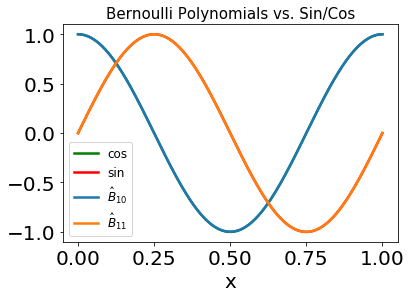

In [34]:
x = np.linspace(0,1,200)
s, c = np.sin(2*np.pi*x), np.cos(2*np.pi*x)

y10 = B[10](x)
y10 /= max(y10)

y11 = B[11](x)
y11 /= max(y11)

from helper import *

show = show_plots(xy=['x',''],title='Bernoulli Polynomials vs. Sin/Cos')

show(x,c,color='green')
show(x,s,color='red')

show(x,y10)
show(x,y11)

show['cos','sin','$\hat{B}_{10}$','$\hat{B}_{11}$']

The polynomials converge to sine and/or cosine for large degree,

$$
\large 
B_{n}(x) \quad \longrightarrow \quad  \frac{2 \, n!}{(2\pi)^{n}}\ \left[\ cos \left( 2 \, \pi\,  x - \frac{(n+2) \,\pi}{2} \right) \ + \ \mathcal{O}\big(\, 2^{-n}\, \big) \ \right], \quad \mathrm{as} \quad n \ \to \infty.
$$

It's easy to find interesting properties fo $B_{n}(x)$. 

What about 
$$
\large
B_{n}(x+1) - B_{n}(x) \quad ?
$$

In [35]:
for n in range(10): (B[n](X+1) - B[n](X)).show()

$0$

$1$

$2\,x$

$3\,x^{2}$

$4\,x^{3}$

$5\,x^{4}$

$6\,x^{5}$

$7\,x^{6}$

$8\,x^{7}$

$9\,x^{8}$

What about 

$$
\large
\frac{1}{p} \sum_{k=0}^{p-1} B_{n}\left( \frac{\,x+k\,}{p} \right) \quad \ = \ \quad ??
$$

In [ ]:
p = 10
q = rational(1,p)

n = 9 
    
Sum = 0*X

for k in range(p): Sum = Sum + B[n](q*(X+k))

Sum *= p**(n-1)

Sum.show()

B[n].show()


$$
\large
\frac{1}{p} \sum_{k=0}^{p-1} B_{n} \left( \frac{\,x+k\,}{p} \right) \quad \ = \ \quad \frac{1}{p^{n}} B_{n}(x)
$$

This is an ***eigenvalue*** relationship. It's also equivalent to the **Euler-Maclaurin formula.**

Strangely, this relation is closely related to the ***bit-shift*** map that is mentioned in relation to the Logistic equation for $\mu=4$. 


There are many more interesting things about Bernoulli polynomials.